In [34]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import control as cntrl
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [132]:
L = 4.7e-5
C = 4.7e-5
R = 1e3
L = 4.7e-1
C = 6-

sim_timestep = 0.01

0.01

In [36]:
top = np.asarray([1])
bottom = np.asarray([L*C, R*C, 1])

array([2.209e-09, 4.700e-02, 1.000e+00])

In [45]:
sys_tf = cntrl.tf(top, bottom)
sys_ss = cntrl.tf2ss(sys_tf)
sys_ss_d = cntrl.c2d(sys_ss, sim_timestep)
np.zeros((sys_ss_d.B.shape[0], 1))

array([[0.],
       [0.]])

In [89]:
def step(sys, mag=1.0, time=5):
    state = np.zeros((sys.A.shape[0], 1))
    dt = sys.dt
    t = []
    y = []
    for i in range(int(time/dt)):
        state = np.matmul(sys.A, state) + sys.B*mag
        output = np.matmul(sys.C, state)
        t.append(i*dt)
        y.append(float(output))
    return t,y

In [94]:
t, y = step(sys_ss_d, mag=1.0, time=1)

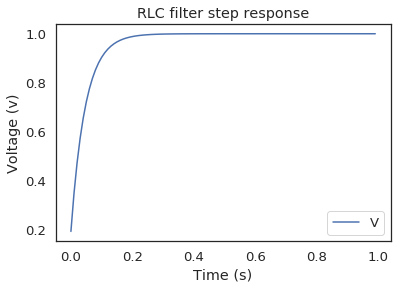

In [99]:
plt.plot(t, y)
plt.legend("V")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (v)")
plt.title("RLC filter step response")
plt.show()

In [133]:
def lsim(sys, vec):
    state = np.zeros((sys.A.shape[0], 1))
    dt = sys.dt
    t = []
    y = []
    for i in range(len(vec)):
        state = np.matmul(sys.A, state) + sys.B*vec[i]
        output = np.matmul(sys.C, state)
        t.append(i*dt)
        y.append(float(output))
    return t,y

In [134]:
sin_x = np.linspace(0, 8*np.pi, 100)
sin_y = np.sin(sin_x)
t, y = lsim(sys_ss_d, sin_y)
sin_x /= 8*np.pi

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

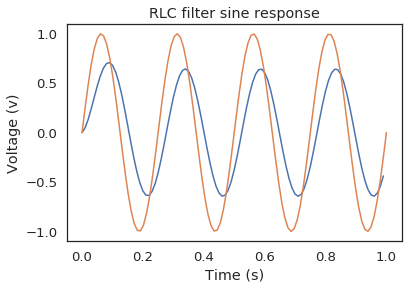

In [135]:
plt.plot(t, y, sin_x, sin_y)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (v)")
plt.title("RLC filter sine response")
plt.show()